# Estadistica Aplicada
## Edwin Javier Hernández Rodríguez
### 6ta sesion 13 feb (dia del actuario)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [4]:
datos = pd.read_excel('modelolineal.xlsx')

In [5]:
datos.head()

,observación,Y,X
0,1,19.246957,23
1,2,16.878501,19
2,3,20.187237,27
3,4,12.176789,13
4,5,21.420112,21


In [7]:
datos.shape #numero de filas y columnas

(30, 3)

In [10]:
datos.describe() #estadistica descriptiva

,observación,Y,X
count,30.000000,30.000000,30.000000
mean,15.500000,19.038965,17.333333
std,8.803408,5.689742,8.372094
min,1.000000,6.808838,0.000000
25%,8.250000,14.128834,12.250000
50%,15.500000,19.937977,19.000000
75%,22.750000,24.151130,23.000000
max,30.000000,28.422786,29.000000


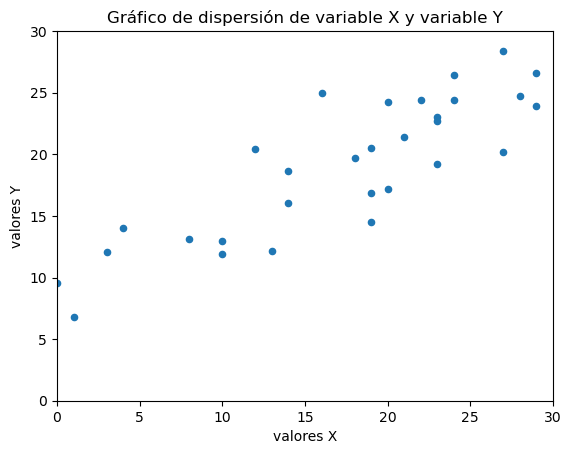

In [13]:
datos.plot.scatter('X','Y')
plt.title('Gráfico de dispersión de variable X y variable Y')
plt.xlabel('valores X')
plt.ylabel('valores Y')
plt.xlim(0,30) #para cortar los valores que no necesitamos
plt.ylim(0,30)
plt.show()

Vamos a estimar el modelo $Y = \beta_0 + \beta_1 X $

In [15]:
reg = smf.ols(formula='Y~X',data=datos)#minimos cuadados
resultado = reg.fit()
print(resultado.summary())#para que muestre la regresión

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.72e-09
Time:                        14:42:17   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

El coeficiente estimado para $\beta_0$ es 8.9619, el p-value: 0.00 < 0.05, lo que significa que rechazamos H0 con un 95% de confianza; el intercepto es distinto de cero.

El coeficiente estimado para $\beta_1$ es de 0.5814 es de 0.5814, el p-value es 0.00 < 0.05 lo que significa que rechazamos  H0 con 95% de confianza; si hay una relacion lineal entre 'X' y 'Y' (el coeficiente es estadisticamente significativo) 

En promedio, cuando X aumenta en una unidad, Y aumenta en 0.58

In [19]:
datos['X2'] = datos['X']**2
datos.head()

,observación,Y,X,X2
0,1,19.246957,23,529
1,2,16.878501,19,361
2,3,20.187237,27,729
3,4,12.176789,13,169
4,5,21.420112,21,441


In [20]:
reg2 = smf.ols(formula = 'Y~X+X2', data=datos)
resultado2 = reg2.fit()
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.92e-08
Time:                        15:00:47   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

X2 no tiene ningun efecto sobre Y
El coeficiente estimado para $\beta_2$ es -0.0007, el p-value: 0.929 > 0.05, lo que significa que NO rechazamos H0 con un 95% de confianza; el intercepto es igual a cero.

El coeficiente estimado para $\beta_1$ es de 0.6029 , el p-value es 0.023 < 0.05 lo que significa que rechazamos  H0 con 95% de confianza; si hay una relacion lineal entre 'X' y 'Y' (el coeficiente es estadisticamente significativo) 


medidas de bondad de ajuste es el coeficiente de determinación R^2

MAD: Desviacion  Absoluta Media
MSD: Desviacion Cuadratica Media                     
MAPE: Error Porcentual Absoluto Medio

Calcular estas 3 de arriba

In [22]:
datos.head()

,observación,Y,X,X2
0,1,19.246957,23,529
1,2,16.878501,19,361
2,3,20.187237,27,729
3,4,12.176789,13,169
4,5,21.420112,21,441


In [23]:
# vamos a generar el pronostico de y (y^)
datos['Y_hat'] = resultado2.predict(datos)

In [24]:
datos.head()

,observación,Y,X,X2,Y_hat
0,1,19.246957,23,529,22.340436
1,2,16.878501,19,361,20.049010
2,3,20.187237,27,729,24.608946
3,4,12.176789,13,169,16.568905
4,5,21.420112,21,441,21.197588


In [26]:
from sklearn.metrics import mean_absolute_error as mad

In [27]:
mad(datos['Y'], datos['Y_hat'])

2.3553110792438807